# Distribuições

- Forma aprofundada de reconhecer características dos dados.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Função massa de probabilidade 

A _função massa de probabilidade_ (FMP) associa uma probabilidade à ocorrência de um certo valor dentro de um _espaço de resultados_. Podemos entender a FMP como um histograma normalizado. Isto é, todas as frequências são divididas pelo número de amostras. 

In [5]:
adults = pd.read_csv('../database/adults.csv',skiprows=1)
adults.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Comparemos a distribuição da variável _idade_ por histograma e pela PMF.

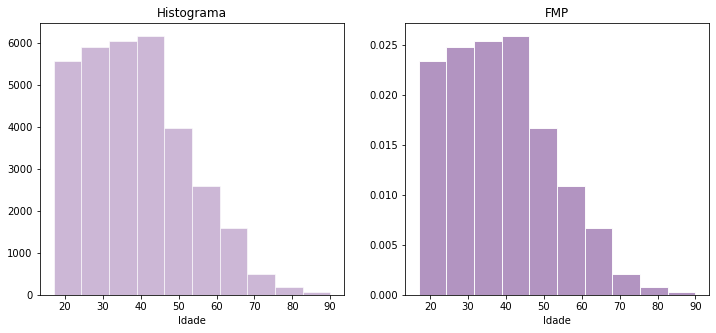

In [6]:
plt.figure(figsize=(12,5)); 
# histograma
plt.subplot(121)
idade = adults['age']
idade.hist(alpha=.6,bins=10,color='#aa88bb',edgecolor='w',grid=False);
plt.xlabel('Idade'); plt.title('Histograma')
# FMP
plt.subplot(122)
idade = adults['age']
idade.hist(alpha=.9,bins=10,density=True,color='#aa88bb',edgecolor='w',grid=False);
plt.xlabel('Idade'); plt.title('FMP');

## Função distribuição cumulativa 

A _função distribuição cumulativa_ (CDF) calcula a probabilidade de uma variável com uma dada distribuição de probabilidade ter um valor menor ou igual a $x$. Em outras palavras, para calcularmos $CDF(x)$ para um valor particular $x$, devemos computar a fração dos valores na amostra que são menores ou iguais a $x$. A CDF é similar ao conceito de _percentil_, mas a resposta é um valor no intervalo [0,1], em vez de um _ranque_ na faixa 0-100.

Considerando um _array_ de amostras `t` e o dado valor $x$, que não necessariamente está em `t`, podemos implementar uma função `CDF` da seguinte forma:

In [9]:
# implementação da CDF
def CDF(t,x):
    c = 0 # contagem
    for ti in t: # cada valor na amostra
        if ti <= x:
            c += 1
    prob = c / len(t) # probabilidade
    return prob

Vejamos um exemplo simples.

In [11]:
# amostra
t = [1,2,3,3,5,7]

CDF(t,2), CDF(t,3), CDF(t,5)

(0.3333333333333333, 0.6666666666666666, 0.8333333333333334)

Comentários:

- A probabilidade de se encontrar um valor menor ou igual a 2 em `t` é de 33,3%.

- A probabilidade de se encontrar um valor menor ou igual a 3 em `t` é de 66,6%.

- A probabilidade de se encontrar um valor menor ou igual a 5 em `t` é de 83,3%.

Para valores fora da amostra:

In [12]:
CDF(t,3.45), CDF(t,1.11)

(0.6666666666666666, 0.16666666666666666)

Se $x$ for menor do que o menor valor de `t`, `CDF(x) = 0`; se $x$ for maior do que o maior valor de `t`, `CDF(x) = 1`.

In [13]:
CDF(t,-4), CDF(t,0.8), CDF(t,7.5), CDF(t,12)

(0.0, 0.0, 1.0, 1.0)

A CDF é uma função _step_:

In [19]:
sex = adults['sex']
im = idade[sex == ' Male']
fm = idade[sex == ' Female']

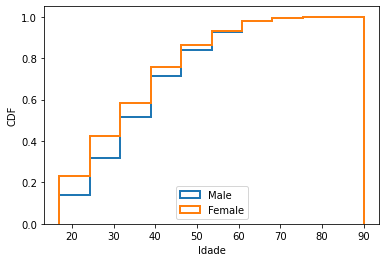

In [16]:
im.hist(density=True,cumulative=True,histtype='step',grid=False,linewidth=2,label='Male')
fm.hist(density=True,cumulative=True,histtype='step',grid=False,linewidth=2,label='Female')
plt.xlabel('Idade')
plt.ylabel('CDF')
plt.legend(loc=8);

## Medição de assimetria

A assimetria das distribuições pode ser medida pelo _coeficiente de Pearson_, dado por:

$$p = 3(\mu - \theta)\sigma,$$

onde $\mu$ é a média, $\theta$ é a mediana e $\sigma$ é o desvio padrão.

Podemos defini-lo como:

In [23]:
# coeficiente de pearson
def p(x):
    return 3*( x.mean() - x.median() )*x.std()

A seguir calculamos o coeficiente de Pearson para a série de idades para homens e mulheres.

In [24]:
p(im), p(fm)

(57.50230041174153, 78.12203531109172)

Comparemos com os histogramas.

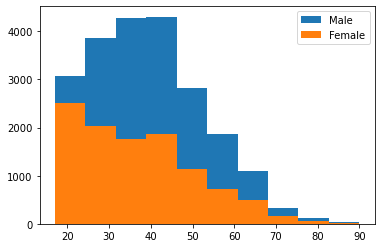

In [12]:
im.hist(grid=False,label='Male')
fm.hist(grid=False,label='Female')
plt.legend();

A interpretação da assimetria é a seguinte:

- Na assimetria à direita (ou positiva), a moda e a mediana localizam-se à esquerda da média. Isto significa que o histograma é mais denso à esquerda. 

- Na assimetria à esquerda (ou negativa), a moda e a mediana localizam-se à direita da média. Isto significa que o histograma é mais denso à direita.

- Coeficientes de assimetria positivos explicam assimetria à direita.

- Coeficientes de assimetria negativos explicam assimetria à esquerda.

- Coeficientes de assimetria nulos explicam simetria (distribuição normal).

Comentários:

- No exemplo anterior, o coeficiente de Pearson maior para a distribuição de idades entre mulheres mostra que ela é mais assimétrica do que a distribuição de idades para homens.

## Distribuições contínuas

Distribuições baseadas em observações de amostras finitas são chamadas de _distribuições empíricas_, a exemplo da FMP anterior. Em muitas situações, necessitamos de _distribuições contínuas_. No caso de funções contínuas, a FMP é generalizada para a _função densidade de probabilidade_ (PDF). A PDF é definida por meio de integração.

### Distribuição exponencial

A _distribuição exponencial_ (DE) serve para medir tempos entre eventos, que são chamados de  "tempos de chegadas" (_inter-arrival times_). Se os eventos têm a mesma probabilidade de ocorrer a qualquer momento, a distribuição dos tempos de chegadas tende a se parecer com uma distribuição exponencial.

DEs são úteis para descrever: o tempo de realização de uma prova, o tempo de vida de aparelhos, o tempo de espera em restaurantes, o tempo para realizar uma prova.

A CDF e a PDF de uma distribuição exponencial são definidas por:

$$CDF(x) = 1 - e^{-\lambda x}, \ \ \ PDF(x) = \lambda e^{-\lambda x},$$

onde $\lambda$ é um parâmetro que define o formato da distribuição.

Uma DE tem: 

- média = $1/\lambda$
- variância = $1/\lambda^2$
- mediana = $\ln(2)/\lambda.$

Para plotar uma DE aleatoriamente, podemos utilizar o _numpy_

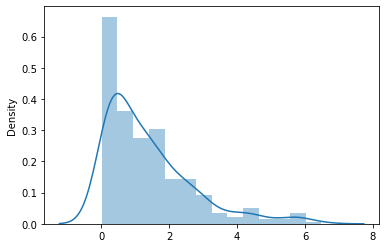

In [33]:
# usando numpy
lamb = 1.3
n = 300
de = np.random.exponential(scale=lamb,size=n)
sb.distplot(de);

ou o _scipy_

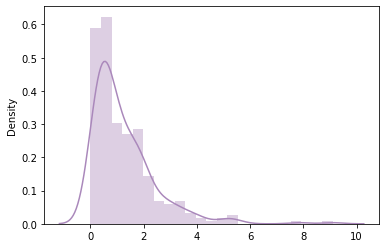

In [52]:
# usando scipy
des = sp.random.exponential(scale=lamb,size=n);
sb.distplot(des,color='#aa88bb');

No próximo exemplo, usamos um valor bem maior de $\lambda$:

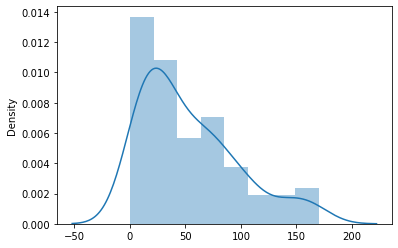

In [65]:
lamb = 50.3
n = 100
de = np.random.exponential(scale=lamb,size=n)
sb.distplot(de);

### Distribuição normal

A _distribuição normal_, ou _distribuição Gaussiana_, possui um formato particularmente simétrico. Ela é a distribuição mais comumente empregada para representar fenômenos econômicos, naturais, sociais, entre outros. Enquanto a CDF para a distribuição normal dependa de integrais que não podem ser expressas em termos de funções elementares, a sua função densidade de probabilidade é dada por

$$PDF(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}}e^{- \frac{(x-\mu)^2}{2\sigma^2}},$$

onde $\mu$ é a média e $\sigma$ o desvio padrão de uma série de dados. 

À medida que os valores de $\mu$ e $\sigma$ são alterados, a forma de "sino" da distribuição "alarga", "afina", "estica" ou se "contrai".

Vejamos como gerar DNs através do _scipy_.

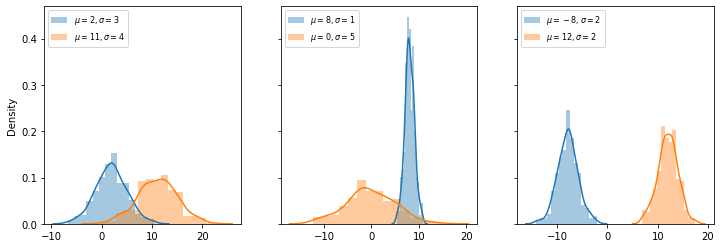

In [70]:
n = 300
mu, sigma = 2, 3
fig, ax = plt.subplots(1,3,sharey=True,figsize=(12,4))
lab = lambda mu,sigma: f'$\mu={mu},\sigma={sigma}$'

dn = sp.random.normal(mu,sigma,n) 
sb.distplot(dn,ax=ax[0],label=lab(mu,sigma));
dn = sp.random.normal(mu+9,sigma+1,n) 
sb.distplot(dn,ax=ax[0],label=lab(mu+9,sigma+1));
ax[0].legend(loc=2,fontsize=8)

dn = sp.random.normal(mu+6,sigma-2,n) 
sb.distplot(dn,ax=ax[1],label=lab(mu+6,sigma-2));
dn = sp.random.normal(mu-2,sigma+2,n) 
sb.distplot(dn,ax=ax[1],label=lab(mu-2,sigma+2));
ax[1].legend(loc=2,fontsize=8)

dn = sp.random.normal(mu-10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],label=lab(mu-10,sigma-1));
dn = sp.random.normal(mu+10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],label=lab(mu+10,sigma-1));
ax[2].legend(loc=2,fontsize=8);

A CDF para essas distribuições pode ser plotada adicionado `kde_kws={'cumulative':True}` na função `distplot` do _seaborn_. Para remover o histograma, basta configurar `hist=False`. 

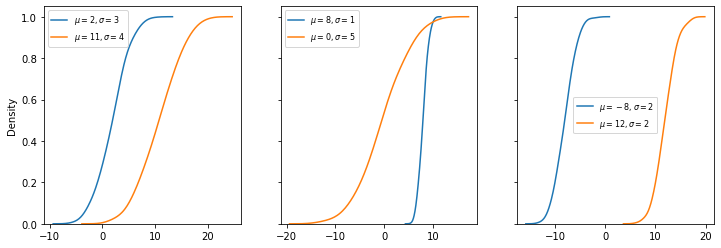

In [72]:
fig, ax = plt.subplots(1,3,sharey=True,figsize=(12,4))

dn = sp.random.normal(mu,sigma,n) 
sb.distplot(dn,ax=ax[0],hist=False,kde_kws={'cumulative':True},
            label=lab(mu,sigma));
dn = sp.random.normal(mu+9,sigma+1,n) 
sb.distplot(dn,ax=ax[0],hist=False,kde_kws={'cumulative':True},
            label=lab(mu+9,sigma+1));
ax[0].legend(loc='best',fontsize=8)

dn = sp.random.normal(mu+6,sigma-2,n) 
sb.distplot(dn,ax=ax[1],hist=False,kde_kws={'cumulative':True},
            label=lab(mu+6,sigma-2));
dn = sp.random.normal(mu-2,sigma+2,n) 
sb.distplot(dn,ax=ax[1],hist=False,kde_kws={'cumulative':True},
            label=lab(mu-2,sigma+2));
ax[1].legend(loc='best',fontsize=8)

dn = sp.random.normal(mu-10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],hist=False,kde_kws={'cumulative':True},
            label=lab(mu-10,sigma-1));
dn = sp.random.normal(mu+10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],hist=False,kde_kws={'cumulative':True},
            label=lab(mu+10,sigma-1));
ax[2].legend(loc='best',fontsize=8);

### Distribuição logística

A _distribuição logística_ (DL) é interessante para fundamentar aplicações de aprendizagem de máquina, principalmente em problemas envolvendo _regressão logística_ e _redes neurais_. A DL é utilizada para descrever fenômenos associados a crescimento ou queda. Modelos biológicos são um exemplo. A função de distribuição geral de uma DL é:

$$PDF(x) = \frac{e^{-\frac{(x-\mu)}{s}}}{s(1 + e^{-\frac{(x-\mu)}{s}})^2},$$

para uma a média $\mu$ e o parâmetro $s$.

Com o _scipy_, podemos gerar DLs da mesma forma que as distribuições anteriores.

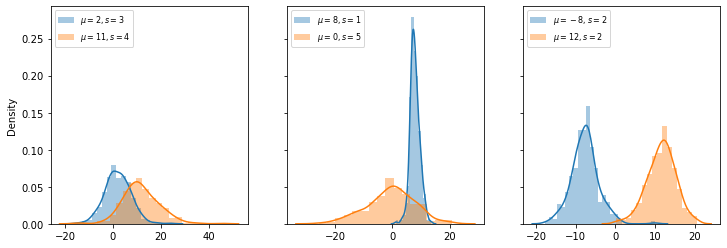

In [76]:
mu, s = 2, 3

fig, ax = plt.subplots(1,3,sharey=True,figsize=(12,4))
lab = lambda mu,s: f'$\mu={mu},s={s}$'

dn = sp.random.logistic(mu,s,n) 
sb.distplot(dn,ax=ax[0],label=lab(mu,s));
dn = sp.random.logistic(mu+9,s+1,n) 
sb.distplot(dn,ax=ax[0],label=lab(mu+9,s+1));
ax[0].legend(loc=2,fontsize=8)

dn = sp.random.logistic(mu+6,s-2,n) 
sb.distplot(dn,ax=ax[1],label=lab(mu+6,s-2));
dn = sp.random.logistic(mu-2,s+2,n) 
sb.distplot(dn,ax=ax[1],label=lab(mu-2,s+2));
ax[1].legend(loc=2,fontsize=8)

dn = sp.random.logistic(mu-10,s-1,n) 
sb.distplot(dn,ax=ax[2],label=lab(mu-10,s-1));
dn = sp.random.logistic(mu+10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],label=lab(mu+10,s-1));
ax[2].legend(loc=2,fontsize=8);

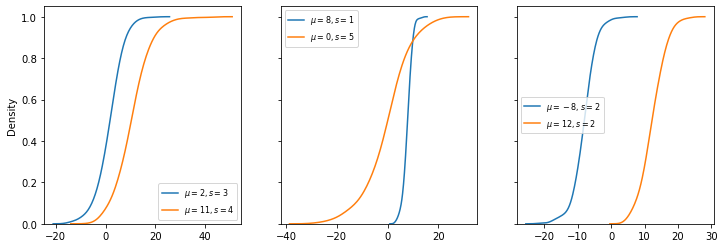

In [78]:
fig, ax = plt.subplots(1,3,sharey=True,figsize=(12,4))

dn = sp.random.logistic(mu,sigma,n) 
sb.distplot(dn,ax=ax[0],hist=False,kde_kws={'cumulative':True},
            label=lab(mu,sigma));
dn = sp.random.logistic(mu+9,sigma+1,n) 
sb.distplot(dn,ax=ax[0],hist=False,kde_kws={'cumulative':True},
            label=lab(mu+9,sigma+1));
ax[0].legend(loc='best',fontsize=8)

dn = sp.random.logistic(mu+6,sigma-2,n) 
sb.distplot(dn,ax=ax[1],hist=False,kde_kws={'cumulative':True},
            label=lab(mu+6,sigma-2));
dn = sp.random.logistic(mu-2,sigma+2,n) 
sb.distplot(dn,ax=ax[1],hist=False,kde_kws={'cumulative':True},
            label=lab(mu-2,sigma+2));
ax[1].legend(loc='best',fontsize=8)

dn = sp.random.logistic(mu-10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],hist=False,kde_kws={'cumulative':True},
            label=lab(mu-10,sigma-1));
dn = sp.random.logistic(mu+10,sigma-1,n) 
sb.distplot(dn,ax=ax[2],hist=False,kde_kws={'cumulative':True},
            label=lab(mu+10,sigma-1));
ax[2].legend(loc='best',fontsize=8);

## Estimadores de densidade de _kernel_

Histogramas possuem o ponto de fraco de definir intervalos de classe (_binning_). Dependendo dos dados com que trabalhamos, métodos diferentes de _binning_ podem levar a interpretações diferentes, visto que a plotagem visual pode ser diferente.

Um _kernel_ especifica o formato da distribuição em cada ponto e a _largura de banda_ controla o tamanho do _kernel_. O propósito de um _kernel density estimator_ (KDE) é buscar uma distribuição contínua do conjunto de dados, quando nosso interesse é apenas fazer uma inspeção geral nos dados.

Há diversos tipos de _kernel_ e rotinas implementados em Python. Entretanto, vamos utilizar os KDEs do módulo _scikit-learn_. 

Vejamos o efeito do _binning_ sobre os dados.

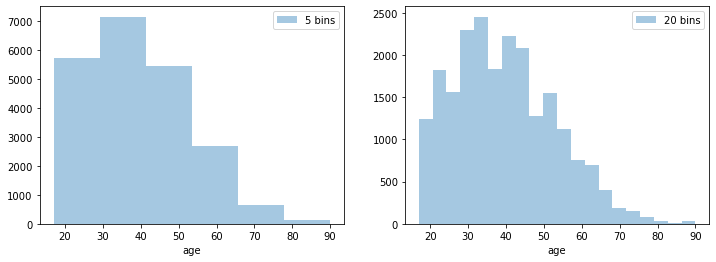

In [87]:
fig, ax = plt.subplots(1,2,sharey=False,figsize=(12,4))
sb.distplot(im,ax=ax[0],bins=6,kde=False,label='5 bins')
ax[0].legend()
sb.distplot(im,ax=ax[1],bins=20,kde=False,label='20 bins')
ax[1].legend();

Os _kernels_ disponíveis no _scikit-learn_ são obtidos a partir da classe `KernelDensity`.

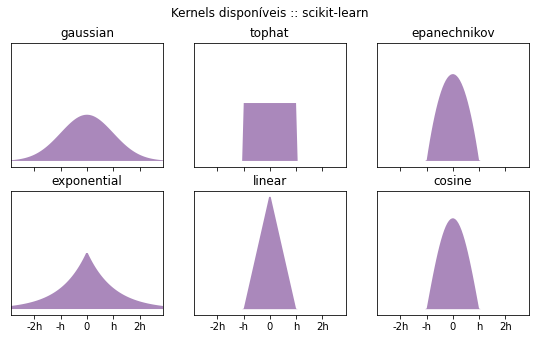

In [89]:
from sklearn.neighbors import KernelDensity
X_plot = np.linspace(-6, 6, 200)[:, None]
X_src = np.zeros((1, 1))
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True,figsize=(8,5))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.2, wspace=0.2)
def ff(x, loc):
     if x == 0:
        return "0"
     elif x == 1:
        return "h"
     elif x == -1:
        return "-h"
     else:
        return f"%ih" % x
for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc='#aa88bb')
    axi.set_title(kernel)
    
    axi.xaxis.set_major_formatter(plt.FuncFormatter(ff))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())
    
    axi.set_xlim(-2.9, 2.9)

plt.suptitle("Kernels disponíveis :: scikit-learn");

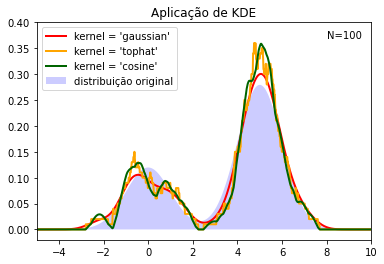

In [22]:
from scipy.stats import norm

N = 100 # amostras
band = 0.5 # largura de banda
kernels = ["gaussian", "tophat", "cosine"]

np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)),
     np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

Xp = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0,1).pdf(Xp[:, 0]) + 0.7 * norm(5, 1).pdf(Xp[:, 0])

fig, ax = plt.subplots()
ax.fill(Xp[:, 0], true_dens, fc="blue", alpha=0.2, label="distribuição original")
colors = ["red", "orange", "darkgreen"]

lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=band).fit(X)
    log_dens = kde.score_samples(Xp)
    ax.plot(
        Xp[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(8, 0.37, "N={0}".format(N))
ax.legend(loc="upper left")
ax.set_xlim(-5, 10)
ax.set_ylim(-0.02, 0.4)
plt.title('Aplicação de KDE');